# American companies Bankruptcy prediction

| Variable Name          | Description                                               |
|------------------------|-----------------------------------------------------------|
| X1                     | Current assets: All assets expected to be sold or used   |
|                        | in standard business operations over the next year       |
| X2                     | Cost of goods sold: Total cost directly related to the   |
|                        | sale of products                                          |
| X3                     | Depreciation and amortization: Loss of value of         |
|                        | tangible and intangible assets over time                 |
| X4                     | EBITDA: Earnings before interest, taxes, depreciation,   |
|                        | and amortization; alternative measure of financial      |
|                        | performance compared to net income                        |
| X5                     | Inventory: Accounting of items and raw materials used   |
|                        | in production or for sale                                 |
| X6                     | Net Income: Overall profitability after deducting       |
|                        | expenses and costs from total revenue                     |
| X7                     | Total Receivables: Balance of money due for delivered   |
|                        | goods or services not yet paid by customers              |
| X8                     | Market value: Asset price in the marketplace, in this    |
|                        | case, market capitalization since companies are publicly|
|                        | traded in the stock market                                |
| X9                     | Net sales: Gross sales minus returns, allowances, and   |
|                        | discounts                                                  |
| X10                    | Total assets: All items of value owned by a business     |
| X11                    | Total Long term debt: Loans and liabilities not due     |
|                        | within one year of the balance sheet date                |
| X12                    | EBIT: Earnings before interest and taxes                 |
| X13                    | Gross Profit: Profit after subtracting costs related     |
|                        | to manufacturing and selling products or services        |
| X14                    | Total Current Liabilities: Sum of accounts payable,      |
|                        | accrued liabilities, taxes, and bonds payable at year end|
| X15                    | Retained Earnings: Profit left after paying costs,       |
|                        | taxes, and dividends to shareholders                      |
| X16                    | Total Revenue: Total income from sales before expenses   |
| X17                    | Total Liabilities: Combined debts and obligations owed   |
|                        | to external parties                                       |
| X18                    | Total Operating Expenses: Business operation expenses    |
| year                   | Year                                                     |
| status_label           | Bank Status: Failed or Alive (Target column)             |

# Importing necessary libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

# Loading Data

In [5]:
df= pd.read_csv(r"E:\python\Bank\american_bankruptcy.csv")

# Exploratory data analysis (EDA)

In [6]:
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


## Summary statistics

In [7]:
def summary(df):
    print(f'data shape: {df.shape}')  
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values 
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

summary(df)

data shape: (78682, 21)


,data type,#missing,%missing,#unique,min,max,first value,second value,third value
company_name,object,0,0.0,8971,NaN,NaN,C_1,C_1,C_1
status_label,object,0,0.0,2,NaN,NaN,alive,alive,alive
year,int64,0,0.0,20,1999.0,2018.0,1999,2000,2001
X1,float64,0,0.0,65895,-7.76,169662.0,511.267,485.856,436.656
X2,float64,0,0.0,65690,-366.645,374623.0,833.107,713.811,526.477
X3,float64,0,0.0,36010,0.0,28430.0,18.373,18.577,22.496
X4,float64,0,0.0,59060,-21913.0,81730.0,89.031,64.367,27.207
X5,float64,0,0.0,38898,0.0,62567.0,336.018,320.59,286.588
X6,float64,0,0.0,55550,-98696.0,104821.0,35.163,18.531,-58.939
X7,float64,0,0.0,49577,-0.006,65812.0,128.348,115.187,77.528


In [8]:
def save_summary_as_image(df, filename):
    # Create the summary table
    summary = pd.DataFrame(df.dtypes, columns=['data type'])
    summary['#missing'] = df.isnull().sum().values 
    summary['%missing'] = df.isnull().sum().values / len(df)* 100
    summary['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summary['min'] = desc['min'].values
    summary['max'] = desc['max'].values
    summary['first value'] = df.loc[0].values
    summary['second value'] = df.loc[1].values
    summary['third value'] = df.loc[2].values

    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))

    # Remove axes for cleaner visualization
    ax.axis('off')

    # Plot the table
    table = ax.table(cellText=summary.values, colLabels=summary.columns, cellLoc='center', loc='center')

    # Style the table
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.2)

    # Save the figure as a PNG image
    plt.savefig(filename, bbox_inches='tight', dpi=300)
    plt.close()

# Call the function to save the summary table as an image
save_summary_as_image(df, 'summary_table.png')

According to the summary, the US Company Bankruptcy DataFrame has 78,682 rows and 21 columns. Here's how the data was analysed:

1. **Data Types:** The DataFrame contains columns with various data types, such as `object`, `int64`, and `float64`.

2. **Missing Values:** There are no missing values in any of the columns as indicated by the `%missing` column showing 0.0% missing values for all columns.

3. **Unique Values:** The number of unique values for each column varies. For instance, `company_name` has 8,971 unique values, `status_label` has 2 unique values, and other columns have different numbers of unique values.

4. **Summary Statistics:** The `describe` function provides statistical summary for numerical columns. It includes count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum values.

5. **Example Values:** The DataFrame displays the first three values for each column under the columns `first value`, `second value`, and `third value`. For instance, `company_name` has the values 'C_1', 'C_1', and 'C_1' for the first three rows.(Companies' names are coded for security reasons.)


# Target Column Distribution

In [9]:
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

print("Alive Ratio:", alive_ratio)
print("Failed Ratio:", failed_ratio)

Alive Ratio: 0.9336569990595054
Failed Ratio: 0.06634300094049465


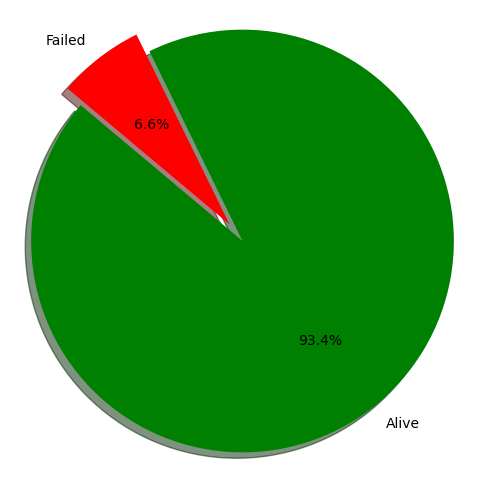

In [10]:
import matplotlib.pyplot as plt

# Given counts and ratios
alive_count = df['status_label'].value_counts()['alive']
failed_count = df['status_label'].value_counts()['failed']
total_count = alive_count + failed_count
alive_ratio = alive_count / total_count
failed_ratio = failed_count / total_count

# Data for the pie chart
labels = ['Alive', 'Failed']
sizes = [alive_ratio, failed_ratio]
colors = ['green', 'red']
explode = (0.1, 0)  # Explode the first slice

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Save the pie chart as a PNG image
plt.savefig('pie_chart.png', bbox_inches='tight', dpi=300)
plt.show()

- The "Alive Ratio" is approximately **0.934**, which means that around **93.4%** of the samples in the dataset belong to the "alive" class (e.g., companies that have not failed or gone bankrupt).

- The "Failed Ratio" is approximately **0.066**, which means that only about **6.6% of** the samples in the dataset belong to the "failed" class (e.g., companies that have experienced bankruptcy or failure).

This significant class imbalance can have implications for building predictive models. When the dataset is **highly imbalanced**, models may be biased towards the majority class (in this case, "alive") and may not perform well in identifying the minority class (in this case, "failed").

To address this issue, you may consider employing techniques such as:

- **Class Balancing Techniques:** Using methods like oversampling the minority class (e.g., Synthetic Minority Over-sampling Technique - SMOTE) or undersampling the majority class to balance the class distribution.

- **Different Evaluation Metrics:** Instead of accuracy, consider using evaluation metrics like precision, recall, F1-score, or area under the ROC curve (AUC), which are more suitable for imbalanced datasets.

- **Algorithm Selection:** Choose algorithms that are less sensitive to class imbalance, such as ensemble methods (e.g., Random Forest, Gradient Boosting) or anomaly detection methods.

- **Cost-sensitive Learning:** Assigning different misclassification costs for each class during model training to reflect the importance of correctly predicting the minority class.

## Outliers

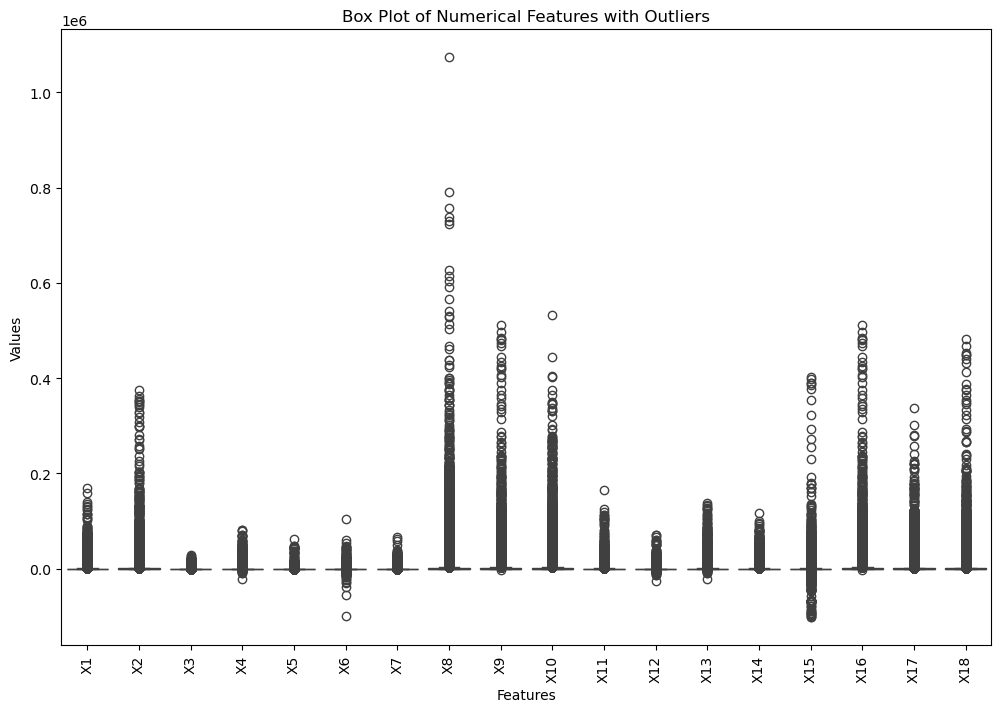

In [11]:
Q1 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.25)
Q3 = df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] < (Q1 - 1.5 * IQR)) | (df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']] > (Q3 + 1.5 * IQR)))

plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']])
plt.xticks(rotation=90)
plt.title("Box Plot of Numerical Features with Outliers")
plt.xlabel("Features")
plt.ylabel("Values")
plt.show()


Well Thats alot!!! Dealing with outliers is crucial to ensure that they do not adversely affect the performance of your predictive models. Outliers can skew the distribution of data and impact the model's ability to generalize to unseen data. Here are some strategies to handle outliers in your dataset:

- Remove Outliers: One straightforward approach is to remove the outliers from the dataset. However, this should be done with caution, as outliers may contain valuable information or represent rare but significant events. Removing too many outliers can lead to loss of important data.
- Outlier Detection Models: Use outlier detection algorithms (e.g., Isolation Forest, One-Class SVM) to identify and mark outliers. You can then choose whether to remove them or treat them separately during analysis.
- Transform Data: Instead of removing outliers, you can apply data transformations to reduce their impact. Common transformations include log-transform, square-root transform, or Box-Cox transform. These transformations can make the data more normally distributed and reduce the effect of extreme values.

## Correlation Matrix

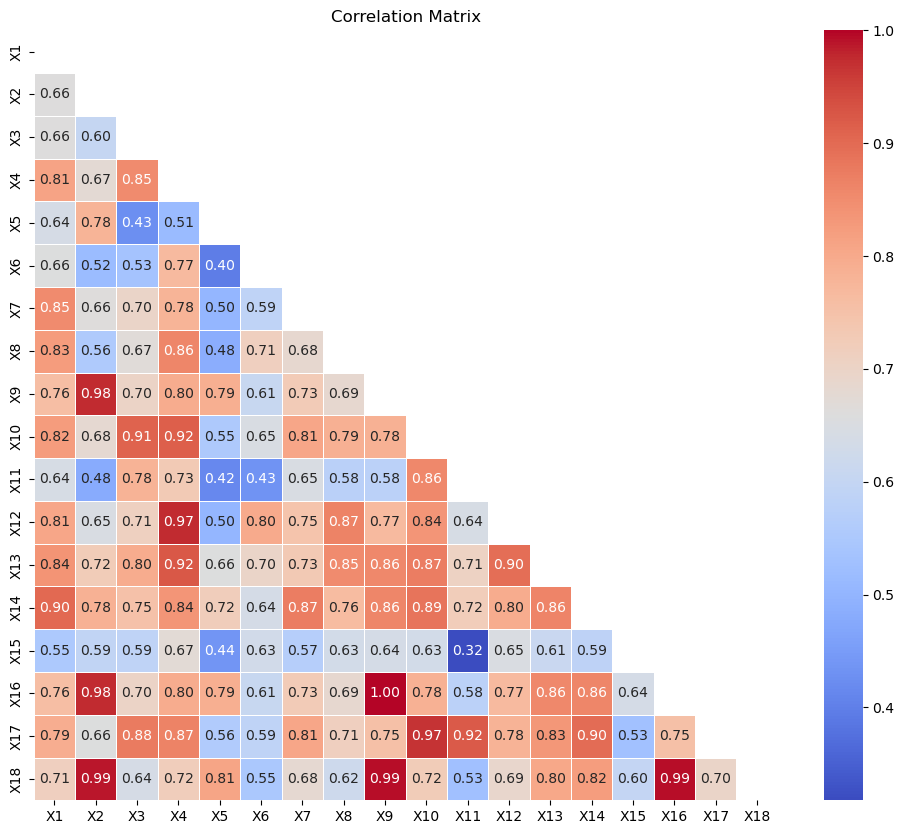

In [12]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')
plt.show()

In [13]:
df.head()

,company_name,status_label,year,X1,X2,X3,X4,X5,X6,X7,...,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
0,C_1,alive,1999,511.267,833.107,18.373,89.031,336.018,35.163,128.348,...,1024.333,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302
1,C_1,alive,2000,485.856,713.811,18.577,64.367,320.590,18.531,115.187,...,874.255,701.854,179.987,45.790,160.444,125.392,204.065,874.255,361.642,809.888
2,C_1,alive,2001,436.656,526.477,22.496,27.207,286.588,-58.939,77.528,...,638.721,710.199,217.699,4.711,112.244,150.464,139.603,638.721,399.964,611.514
3,C_1,alive,2002,396.412,496.747,27.172,30.745,259.954,-12.410,66.322,...,606.337,686.621,164.658,3.573,109.590,203.575,124.106,606.337,391.633,575.592
4,C_1,alive,2003,432.204,523.302,26.680,47.491,247.245,3.504,104.661,...,651.958,709.292,248.666,20.811,128.656,131.261,131.884,651.958,407.608,604.467


In [14]:
variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
correlation_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18
X1,1.000000,0.660564,0.659173,0.812872,0.638698,0.657366,0.851945,0.826568,0.758712,0.824172,0.641522,0.806540,0.839140,0.903493,0.549777,0.758712,0.794479,0.713187
X2,0.660564,1.000000,0.601328,0.674880,0.780846,0.517079,0.662863,0.556610,0.975963,0.681138,0.479374,0.646028,0.723855,0.784213,0.593223,0.975963,0.657386,0.988994
X3,0.659173,0.601328,1.000000,0.853222,0.426229,0.534297,0.696474,0.668160,0.700824,0.911330,0.781753,0.712093,0.796021,0.752106,0.588563,0.700824,0.877051,0.639004
X4,0.812872,0.674880,0.853222,1.000000,0.512667,0.766148,0.779820,0.859896,0.796124,0.916728,0.730642,0.973745,0.923711,0.835342,0.674287,0.796124,0.865836,0.719960
X5,0.638698,0.780846,0.426229,0.512667,1.000000,0.395436,0.503019,0.483074,0.791135,0.553202,0.415740,0.504091,0.657215,0.719630,0.436993,0.791135,0.557678,0.808342
X6,0.657366,0.517079,0.534297,0.766148,0.395436,1.000000,0.588943,0.714706,0.606444,0.646947,0.434078,0.798147,0.696554,0.637441,0.628653,0.606444,0.587707,0.547576
X7,0.851945,0.662863,0.696474,0.779820,0.503019,0.588943,1.000000,0.684549,0.726521,0.806388,0.645599,0.745765,0.731790,0.872734,0.570250,0.726521,0.807136,0.682650
X8,0.826568,0.556610,0.668160,0.859896,0.483074,0.714706,0.684549,1.000000,0.685420,0.789200,0.576519,0.865917,0.853052,0.762850,0.629782,0.685420,0.712536,0.620050
X9,0.758712,0.975963,0.700824,0.796124,0.791135,0.606444,0.726521,0.685420,1.000000,0.784902,0.581507,0.765814,0.856822,0.858866,0.635692,1.000000,0.754276,0.993149
X10,0.824172,0.681138,0.911330,0.916728,0.553202,0.646947,0.806388,0.789200,0.784902,1.000000,0.856592,0.836285,0.873375,0.885808,0.631864,0.784902,0.967443,0.723169


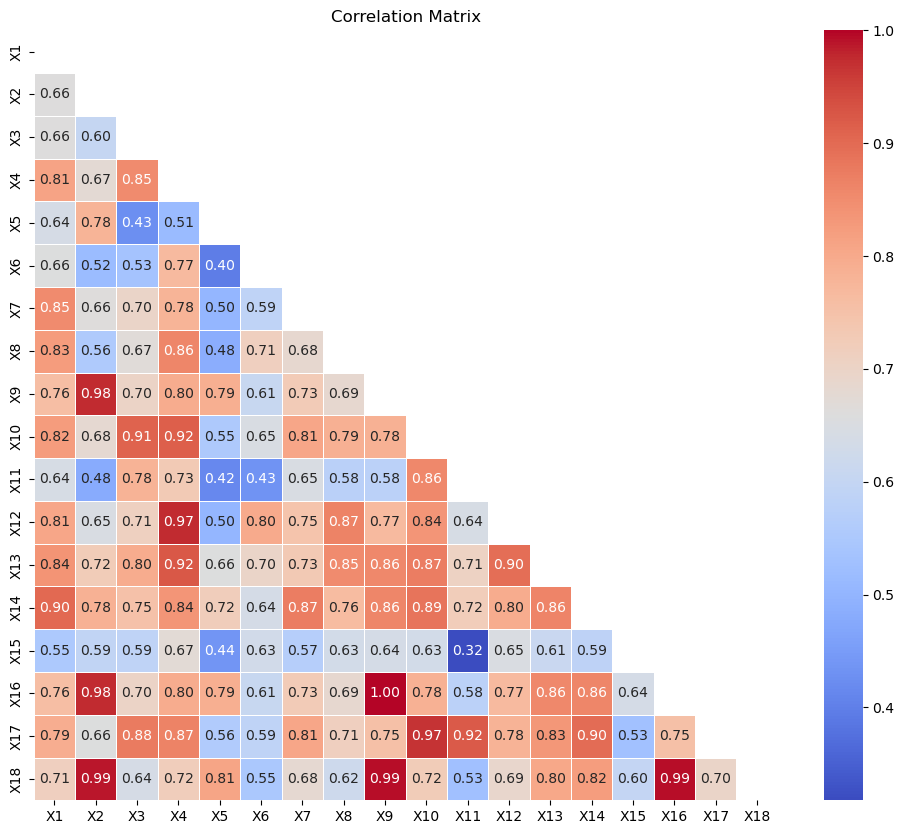

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18']
data = df[variables]
correlation_matrix = data.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, mask=mask)
plt.title('Correlation Matrix')

# Save the heatmap as an image
plt.savefig('correlation_heatmap.png', bbox_inches='tight', dpi=300)
plt.show()


# Pre-Processing

In [16]:
df['status_label'] = df['status_label'].map({'alive': 1, 'failed': 0})
X = df.drop(columns=['company_name', 'status_label'])
y = df['status_label']

- Convert the categorical target variable 'status_label' to numerical labels (1 for 'alive' and 0 for 'failed').
- Create the feature matrix X, excluding the 'company_name' and 'status_label' columns, to be used for training the machine learning model.
- Set the target variable y as the numerical 'status_label', representing the labels for the training dataset.

After these preprocessing steps, you can proceed with model training using X as the feature matrix and y as the target variable.

# Features Selection

# Using LogisticRegression and RandomForestRegressor

We are performing feature selection using two different algorithms: Logistic Regression and Random Forests. The goal of feature selection is to identify a subset of relevant features from the original dataset that will be used for model training. By selecting only the most important features, we aim to reduce the complexity of the model, improve its performance, and potentially avoid overfitting.

In [17]:
logit_model = LogisticRegression()

logit_model.fit(X, y)
logit_feature_importances = pd.Series(logit_model.coef_[0], index=X.columns).abs()
selected_features_logit = logit_feature_importances.nlargest(10).index.tolist()

rf_model = RandomForestClassifier()

rf_model.fit(X, y)
rf_feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns).abs()
selected_features_rf = rf_feature_importances.nlargest(10).index.tolist()

df_logit_selected = df[['company_name', 'status_label'] + selected_features_logit]
df_rf_selected = df[['company_name', 'status_label'] + selected_features_rf]
print("Selected features using logistic regression:", selected_features_logit)
print("Selected features using random forests:", selected_features_rf)

Selected features using logistic regression: ['year', 'X5', 'X1', 'X14', 'X12', 'X3', 'X8', 'X7', 'X17', 'X11']
Selected features using random forests: ['X8', 'X15', 'X3', 'X1', 'X17', 'X7', 'X13', 'X10', 'X6', 'X14']


In [18]:
selected_features_logit = ['year', 'X5', 'X1', 'X14', 'X12', 'X3', 'X8', 'X7', 'X17', 'X11']
selected_features_rf = ['X8', 'X15', 'X3', 'X1', 'X17', 'X7', 'X13', 'X10', 'X14', 'X6']

df_logit_selected = df[['status_label'] + selected_features_logit]
df_rf_selected = df[['status_label'] + selected_features_rf]

print("New dataset with selected features from logistic regression:")
print(df_logit_selected.head())

print("\nNew dataset with selected features from random forests:")
print(df_rf_selected.head())

df_logit_selected.to_csv('logit_selected_features_dataset.csv', index=False)
df_rf_selected.to_csv('rf_selected_features_dataset.csv', index=False)

print("Datasets saved to CSV files.")

New dataset with selected features from logistic regression:
   status_label  year       X5       X1      X14     X12      X3        X8  \
0             1  1999  336.018  511.267  163.816  70.658  18.373  372.7519   
1             1  2000  320.590  485.856  125.392  45.790  18.577  377.1180   
2             1  2001  286.588  436.656  150.464   4.711  22.496  364.5928   
3             1  2002  259.954  396.412  203.575   3.573  27.172  143.3295   
4             1  2003  247.245  432.204  131.261  20.811  26.680  308.9071   

        X7      X17      X11  
0  128.348  401.483  180.447  
1  115.187  361.642  179.987  
2   77.528  399.964  217.699  
3   66.322  391.633  164.658  
4  104.661  407.608  248.666  

New dataset with selected features from random forests:
   status_label        X8      X15      X3       X1      X17       X7  \
0             1  372.7519  201.026  18.373  511.267  401.483  128.348   
1             1  377.1180  204.065  18.577  485.856  361.642  115.187   
2       

In [19]:
df_rf_selected.shape, df_logit_selected.shape

((78682, 11), (78682, 11))

# Model Building

# RandomForestClassifier

Random Forest Accuracy: 93.51%
Confusion Matrix:
[[   57  1011]
 [   10 14659]]


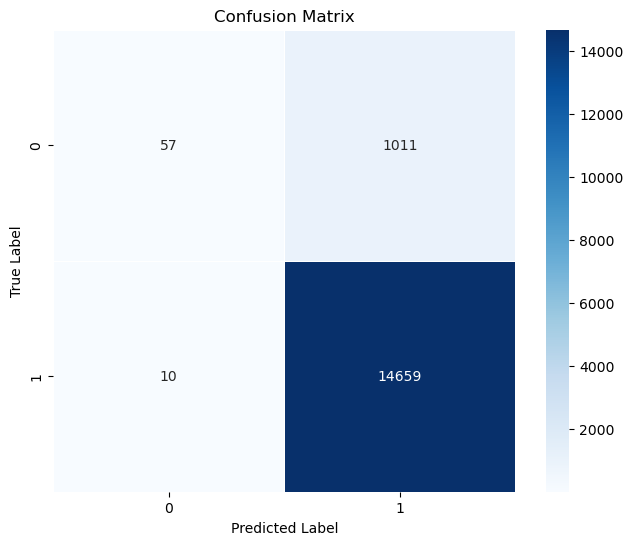

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.05      0.10      1068
           1       0.94      1.00      0.97     14669

    accuracy                           0.94     15737
   macro avg       0.89      0.53      0.53     15737
weighted avg       0.93      0.94      0.91     15737



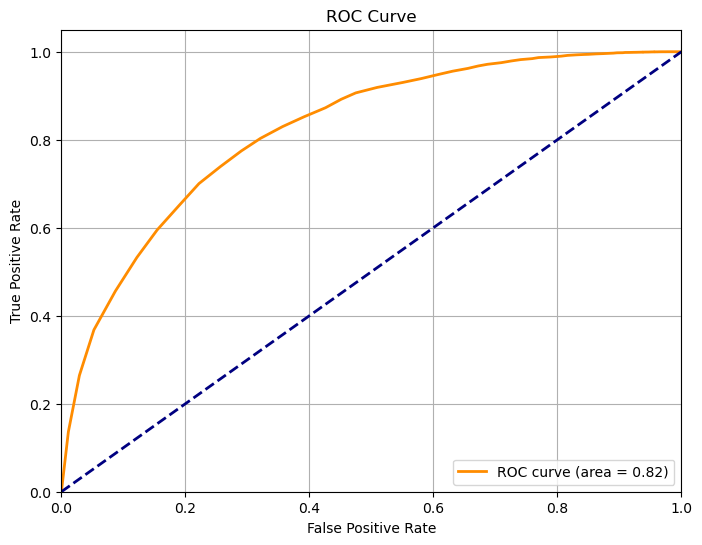

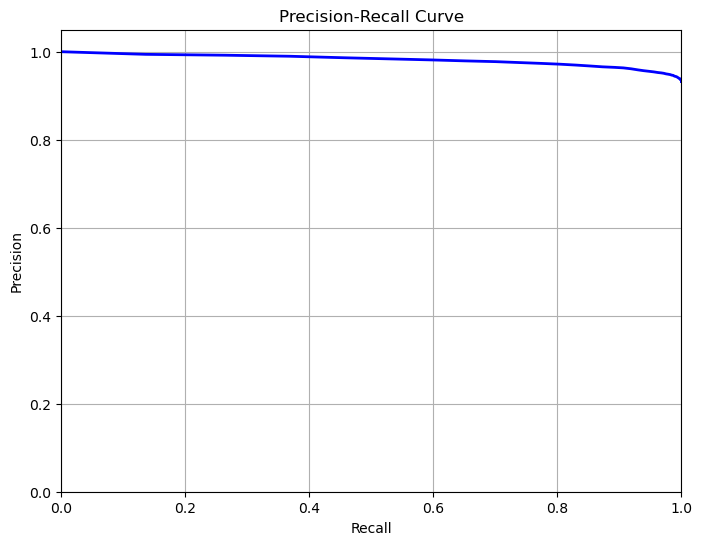


Cross-Validation Scores:
Fold 1: 93.28%
Fold 2: 93.25%
Fold 3: 93.16%
Fold 4: 93.16%
Fold 5: 93.41%
Average Cross-Validation Score: 93.25%


In [20]:
X_rf = df_rf_selected.drop('status_label', axis=1)
y_rf = df_rf_selected['status_label']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_rf_train, y_rf_train)
y_rf_pred = rf_model.predict(X_rf_test)
rf_accuracy = accuracy_score(y_rf_test, y_rf_pred)
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy * 100))

# Confusion Matrix
cm = confusion_matrix(y_rf_test, y_rf_pred)
print("Confusion Matrix:")
print(cm)

# Plot Confusion Matrix as a Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
cr = classification_report(y_rf_test, y_rf_pred)
print("Classification Report:")
print(cr)

# ROC Curve and AUC-ROC
y_rf_scores = rf_model.predict_proba(X_rf_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_rf_test, y_rf_scores)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, thresholds_pr = precision_recall_curve(y_rf_test, y_rf_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

#Cross-Validation Scores
cv_scores = cross_val_score(rf_model, X_rf, y_rf, cv=5)
print("\nCross-Validation Scores:")
for i, score in enumerate(cv_scores):
    print("Fold {}: {:.2f}%".format(i + 1, score * 100))

# Average Cross-Validation Score
average_cv_score = cv_scores.mean()
print("Average Cross-Validation Score: {:.2f}%".format(average_cv_score * 100))

In [21]:
print(X_rf_train.shape)  # X_train should be (rows, features)


(62945, 10)


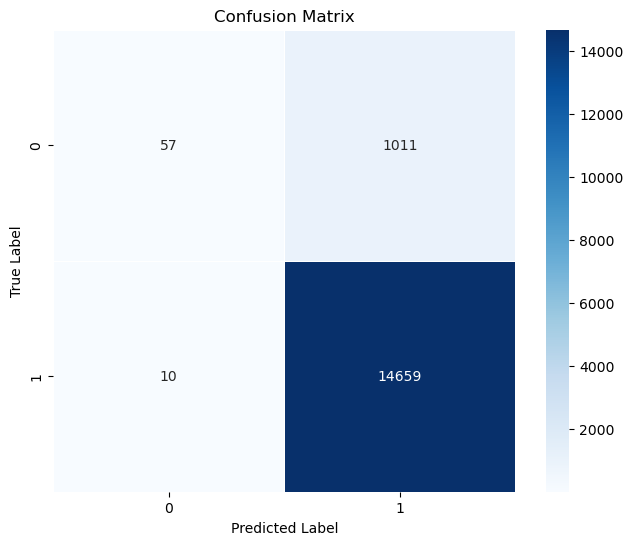

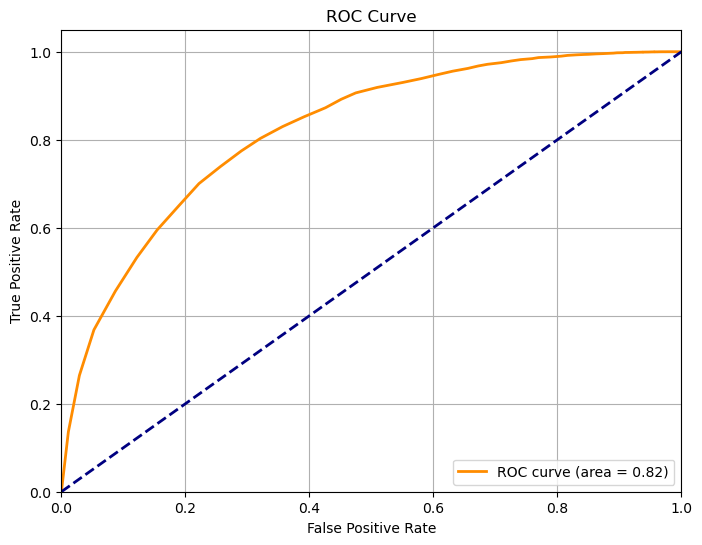

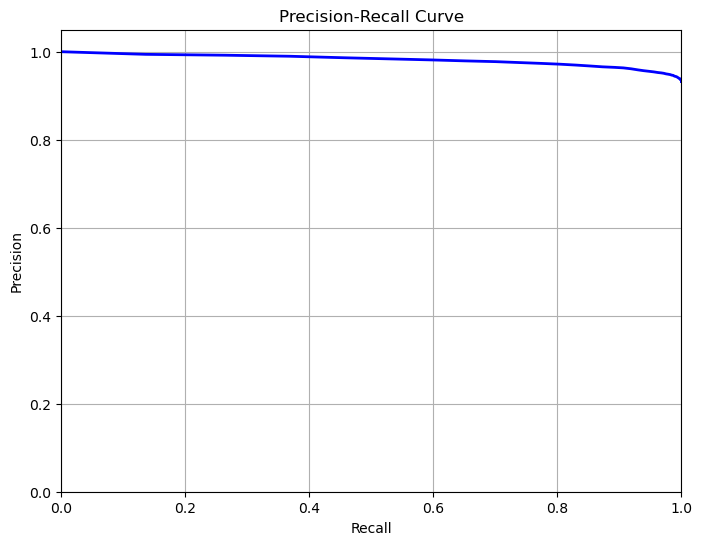

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", linewidths=0.5, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png', bbox_inches='tight', dpi=300)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve.png', bbox_inches='tight', dpi=300)
plt.show()


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.savefig('precision_recall_curve.png', bbox_inches='tight', dpi=300)
plt.show()


## Support Vector Machine (SVM)

In [23]:
X_rf = df_rf_selected.drop('status_label', axis=1)
y_rf = df_rf_selected['status_label']

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)

svm_model = SVC(random_state=42)
svm_model.fit(X_rf_train, y_rf_train)
y_rf_pred = svm_model.predict(X_rf_test)

svm_accuracy = accuracy_score(y_rf_test, y_rf_pred)
print("SVM Accuracy: {:.2f}%".format(svm_accuracy * 100))

# Confusion Matrix
cm_svm = confusion_matrix(y_rf_test, y_rf_pred)
print("Confusion Matrix:")
print(cm_svm)

# Classification Report
cr_svm = classification_report(y_rf_test, y_rf_pred)
print("Classification Report:")
print(cr_svm)

SVM Accuracy: 93.21%
Confusion Matrix:
[[    0  1068]
 [    0 14669]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1068
           1       0.93      1.00      0.96     14669

    accuracy                           0.93     15737
   macro avg       0.47      0.50      0.48     15737
weighted avg       0.87      0.93      0.90     15737



c:\Users\Unnatesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Unnatesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Unnatesh\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## DecisionTreeClassifier

In [24]:
X_logit = df_logit_selected.drop('status_label', axis=1)
y_logit = df_logit_selected['status_label']
X_logit_train, X_logit_test, y_logit_train, y_logit_test = train_test_split(X_logit, y_logit, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_logit_train, y_logit_train)

y_logit_pred = dt_model.predict(X_logit_test)

dt_accuracy = accuracy_score(y_logit_test, y_logit_pred)
print("Decision Tree Accuracy: {:.2f}%".format(dt_accuracy * 100))

# Confusion Matrix
cm_dt = confusion_matrix(y_logit_test, y_logit_pred)
print("Confusion Matrix:")
print(cm_dt)

# Classification Report
cr_dt = classification_report(y_logit_test, y_logit_pred)
print("Classification Report:")
print(cr_dt)

Decision Tree Accuracy: 89.47%
Confusion Matrix:
[[  277   791]
 [  866 13803]]
Classification Report:
              precision    recall  f1-score   support

           0       0.24      0.26      0.25      1068
           1       0.95      0.94      0.94     14669

    accuracy                           0.89     15737
   macro avg       0.59      0.60      0.60     15737
weighted avg       0.90      0.89      0.90     15737



## Hyperparameters tuning using Grid Search

In [25]:
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

dt_tuned = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt_tuned, param_grid, cv=5)
grid_search.fit(X_logit_train, y_logit_train)

best_dt_model = grid_search.best_estimator_
best_dt_pred = best_dt_model.predict(X_logit_test)
best_dt_accuracy = accuracy_score(y_logit_test, best_dt_pred)
print("Best Decision Tree Accuracy: {:.2f}%".format(best_dt_accuracy * 100))

# Confusion Matrix
cm_dt = confusion_matrix(y_logit_test, best_dt_pred)
print("Confusion Matrix:")
print(cm_dt)

# Classification Report
cr_dt = classification_report(y_logit_test, best_dt_pred)
print("Classification Report:")
print(cr_dt)

KeyboardInterrupt: 

## xgboost

XGBoost Accuracy: 93.35%
Confusion Matrix:
[[   69   999]
 [   48 14621]]
Classification Report:
              precision    recall  f1-score   support

           0       0.59      0.06      0.12      1068
           1       0.94      1.00      0.97     14669

    accuracy                           0.93     15737
   macro avg       0.76      0.53      0.54     15737
weighted avg       0.91      0.93      0.91     15737



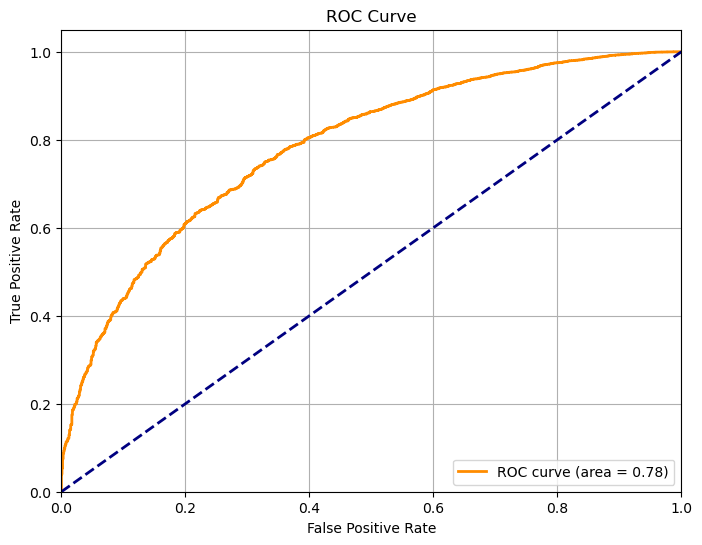

<Figure size 640x480 with 0 Axes>

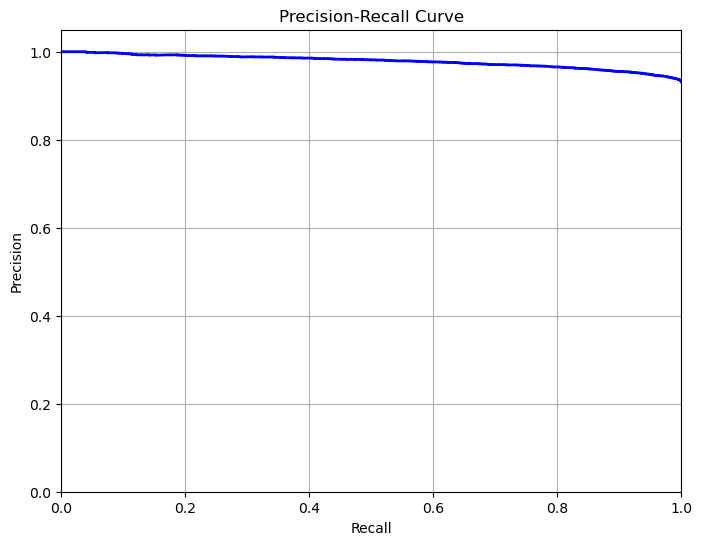

<Figure size 640x480 with 0 Axes>


Cross-Validation Scores:
Fold 1: 93.07%
Fold 2: 92.88%
Fold 3: 92.91%
Fold 4: 92.74%
Fold 5: 93.18%
Average Cross-Validation Score: 92.96%


In [ ]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Splitting the data
X_xgb = df_rf_selected.drop('status_label', axis=1)
y_xgb = df_rf_selected['status_label']
X_xgb_train, X_xgb_test, y_xgb_train, y_xgb_test = train_test_split(X_xgb, y_xgb, test_size=0.2, random_state=42)


label_encoder = LabelEncoder()
y_xgb_train = label_encoder.fit_transform(y_xgb_train)
y_xgb_test = label_encoder.transform(y_xgb_test)
y_xgb_encoded = label_encoder.transform(y_xgb)

# Create XGBoost model
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_xgb_train, y_xgb_train)

# Predictions
y_xgb_pred = xgb_model.predict(X_xgb_test)

# Accuracy
xgb_accuracy = accuracy_score(y_xgb_test, y_xgb_pred)
print("XGBoost Accuracy: {:.2f}%".format(xgb_accuracy * 100))

# Confusion Matrix
cm_xgb = confusion_matrix(y_xgb_test, y_xgb_pred)
print("Confusion Matrix:")
print(cm_xgb)

# Classification Report
cr_xgb = classification_report(y_xgb_test, y_xgb_pred)
print("Classification Report:")
print(cr_xgb)

# ROC Curve and AUC-ROC
y_xgb_scores = xgb_model.predict_proba(X_xgb_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_xgb_test, y_xgb_scores)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
plt.savefig('xgb_roc_curve.png', bbox_inches='tight', dpi=300)
plt.show()


# Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_pr_xgb = precision_recall_curve(y_xgb_test, y_xgb_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()
plt.savefig('xgb_precision_recall_curve.png', bbox_inches='tight', dpi=300)
plt.show()

# Cross-Validation Scores
cv_scores_xgb = cross_val_score(xgb_model, X_xgb, y_xgb_encoded, cv=5)
print("\nCross-Validation Scores:")
for i, score in enumerate(cv_scores_xgb):
    print("Fold {}: {:.2f}%".format(i + 1, score * 100))

# Average Cross-Validation Score
average_cv_score_xgb = cv_scores_xgb.mean()
print("Average Cross-Validation Score: {:.2f}%".format(average_cv_score_xgb * 100))

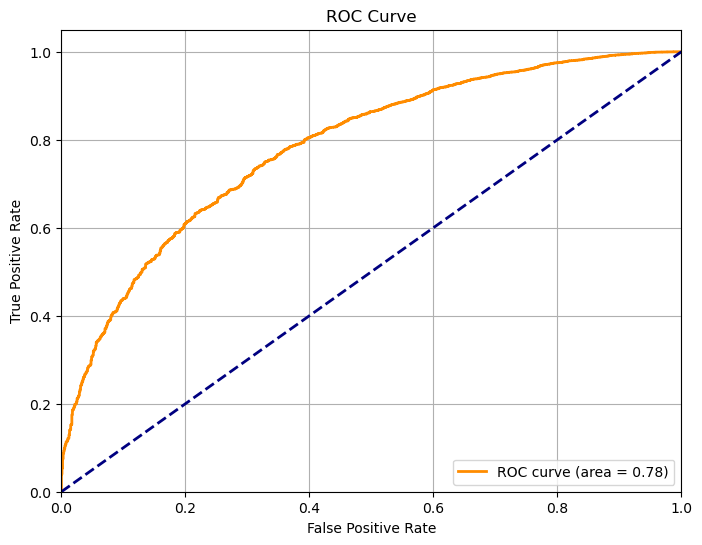

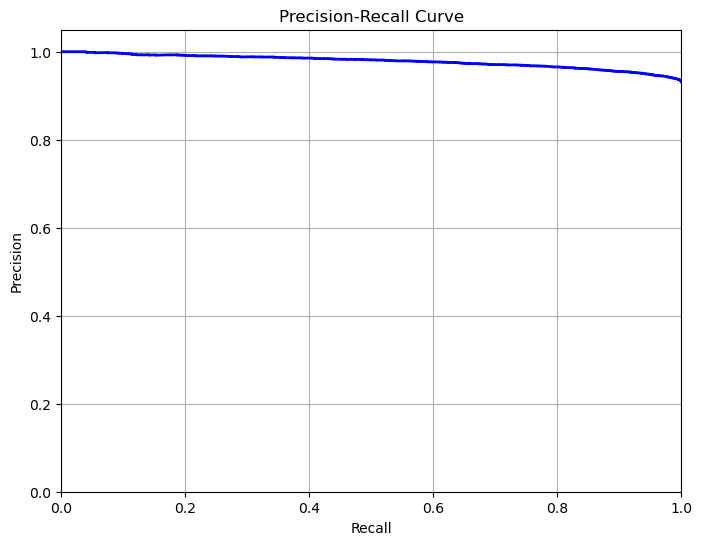

In [ ]:
y_xgb_scores = xgb_model.predict_proba(X_xgb_test)[:, 1]
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_xgb_test, y_xgb_scores)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

plt.figure(figsize=(8, 6))
plt.plot(fpr_xgb, tpr_xgb, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_xgb))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('xgb_roc_curve.png', bbox_inches='tight', dpi=300)  # Save before showing
plt.show()

# Precision-Recall Curve
precision_xgb, recall_xgb, thresholds_pr_xgb = precision_recall_curve(y_xgb_test, y_xgb_scores)

plt.figure(figsize=(8, 6))
plt.plot(recall_xgb, precision_xgb, color='blue', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.savefig('xgb_precision_recall_curve.png', bbox_inches='tight', dpi=300)  # Save before showing
plt.show()

## GradientBoostingClassifier

In [ ]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_rf_train, y_rf_train)
y_gb_pred = gb_model.predict(X_rf_test)

# Calculate accuracy
gb_accuracy = accuracy_score(y_rf_test, y_gb_pred)
print("Gradient Boosting Accuracy: {:.2f}%".format(gb_accuracy * 100))

# Confusion Matrix
cm_gb = confusion_matrix(y_rf_test, y_gb_pred)
print("Confusion Matrix:")
print(cm_gb)

# Classification Report
cr_gb = classification_report(y_rf_test, y_gb_pred)
print("Classification Report:")
print(cr_gb)

Gradient Boosting Accuracy: 93.23%
Confusion Matrix:
[[   13  1055]
 [   10 14659]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.01      0.02      1068
           1       0.93      1.00      0.96     14669

    accuracy                           0.93     15737
   macro avg       0.75      0.51      0.49     15737
weighted avg       0.91      0.93      0.90     15737



In [ ]:
from sklearn.metrics import roc_auc_score, f1_score

In [ ]:
y_rf_pred = svm_model.predict(X_rf_test)

# Get decision function scores for SVM
y_svm_scores = svm_model.decision_function(X_rf_test)

# Calculate ROC AUC for SVM
roc_auc_svm = roc_auc_score(y_rf_test, y_svm_scores)

# Calculate F1 Score for SVM
f1_score_svm = f1_score(y_rf_test, y_rf_pred)

In [ ]:
cv_scores_svm = cross_val_score(best_dt_model, X_rf, y_rf, cv=5)
average_cv_score_svm = cv_scores_svm.mean()

In [ ]:
# Calculate ROC AUC for Decision Tree
roc_auc_dt = roc_auc_score(y_logit_test, best_dt_pred)

# Calculate F1 Score for Decision Tree
f1_score_dt = f1_score(y_logit_test, best_dt_pred)

# Calculate Cross-Validation Scores for Decision Tree using the same data and model from Random Forest
cv_scores_dt = cross_val_score(best_dt_model, X_rf, y_rf, cv=5)
average_cv_score_dt = cv_scores_dt.mean()

In [ ]:
# Calculate ROC AUC for Gradient Boosting
roc_auc_gb = roc_auc_score(y_rf_test, y_gb_pred)

# Calculate F1 Score for Gradient Boosting
f1_score_gb = f1_score(y_rf_test, y_gb_pred)

# Calculate Cross-Validation Scores for Gradient Boosting
cv_scores_gb = cross_val_score(gb_model, X_rf, y_rf, cv=5)
average_cv_score_gb = cv_scores_gb.mean()


In [ ]:
y_rf_pred = rf_model.predict(X_rf_test)
y_rf_true = y_rf_test  # Replace with your true labels

# Calculate F1 Score for Random Forest
f1_score_rf = f1_score(y_rf_true, y_rf_pred)

In [ ]:
f1_score_rf = f1_score(y_rf_test, y_gb_pred)
f1_score_xgb = f1_score(y_rf_test, y_rf_pred)

In [ ]:
import pandas as pd

# Create a dictionary to store the model names and their respective metrics
model_metrics = {
    'Model': ['RandomForest', 'SVM', 'DecisionTree', 'XGBoost', 'GradientBoosting'],
    'Accuracy': [rf_accuracy, svm_accuracy, dt_accuracy, xgb_accuracy, gb_accuracy],
    'ROC AUC': [roc_auc, roc_auc_svm, roc_auc_dt, roc_auc_xgb, roc_auc_gb],
    'F1 Score': [f1_score_rf, f1_score_svm, f1_score_dt, f1_score_xgb, f1_score_gb],
    'Cross-Validation Score': [average_cv_score, average_cv_score_svm, average_cv_score_dt, average_cv_score_xgb, average_cv_score_gb]
}

# Create a DataFrame from the dictionary
summary_df = pd.DataFrame(model_metrics)

# Display the summary table
print(summary_df)


              Model  Accuracy   ROC AUC  F1 Score  Cross-Validation Score
0      RandomForest  0.935121  0.821221  0.964948                0.932513
1               SVM  0.932134  0.581169  0.964875                0.932348
2      DecisionTree  0.894707  0.508750  0.964897                0.932348
3           XGBoost  0.933469  0.784018  0.966347                0.929577
4  GradientBoosting  0.932325  0.505745  0.964948                0.932844


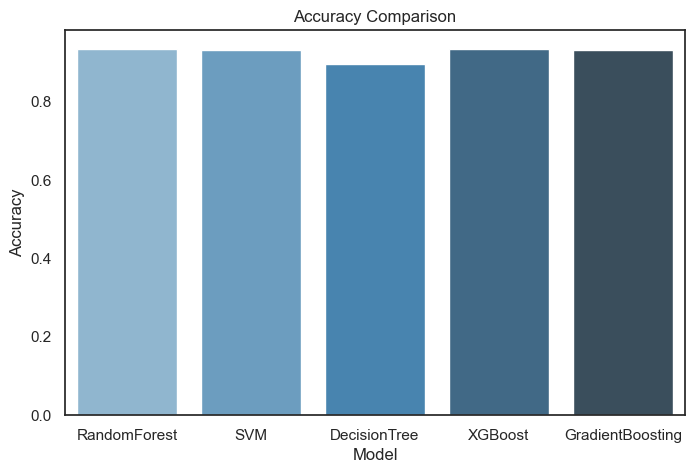

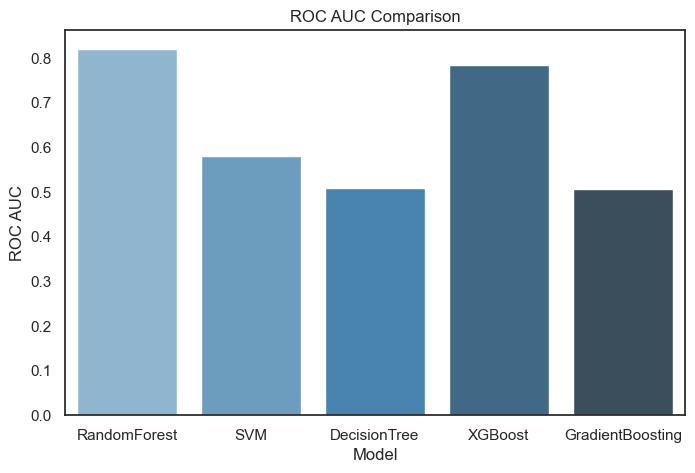

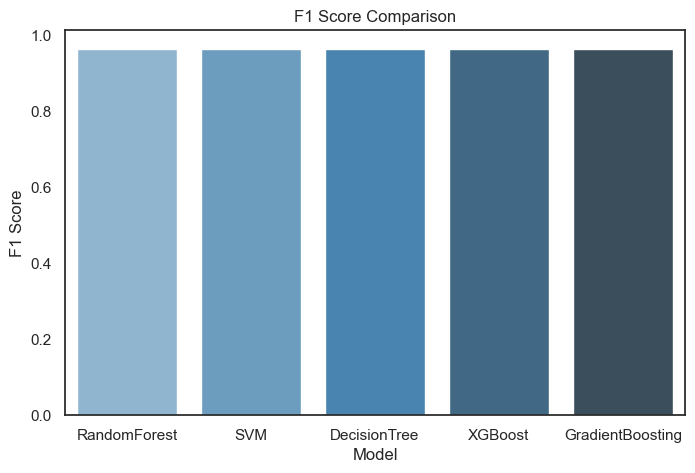

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with your model metrics
model_metrics = {
    'Model': ['RandomForest', 'SVM', 'DecisionTree', 'XGBoost', 'GradientBoosting'],
    'Accuracy': [rf_accuracy, svm_accuracy, dt_accuracy, xgb_accuracy, gb_accuracy],
    'ROC AUC': [roc_auc, roc_auc_svm, roc_auc_dt, roc_auc_xgb, roc_auc_gb],
    'F1 Score': [f1_score_rf, f1_score_svm, f1_score_dt, f1_score_xgb, f1_score_gb],
}

summary_df = pd.DataFrame(model_metrics)

# Set the style of the plot to white background with no grid lines
sns.set(style="white", rc={"axes.grid": False})

# Create a bar plot for Accuracy
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='Accuracy', data=summary_df, palette="Blues_d")
plt.title('Accuracy Comparison')

# Save the plot as an image
plt.savefig('accuracy_comparison.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

# Create a bar plot for ROC AUC
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='ROC AUC', data=summary_df, palette="Blues_d")
plt.title('ROC AUC Comparison')

# Save the plot as an image
plt.savefig('roc_auc_comparison.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

# Create a bar plot for F1 Score
plt.figure(figsize=(8, 5))
sns.barplot(x='Model', y='F1 Score', data=summary_df, palette="Blues_d")
plt.title('F1 Score Comparison')

# Save the plot as an image
plt.savefig('f1_score_comparison.png', bbox_inches='tight', dpi=300)

# Show the plot
plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Create a DataFrame with your model metrics
# model_metrics = {
#     'Model': ['RandomForest', 'SVM', 'DecisionTree', 'XGBoost', 'GradientBoosting'],
#     'Accuracy': [rf_accuracy, svm_accuracy, dt_accuracy, xgb_accuracy, gb_accuracy],
#     'ROC AUC': [roc_auc, roc_auc_svm, roc_auc_dt, roc_auc_xgb, roc_auc_gb],
#     'F1 Score': [f1_score_rf, f1_score_svm, f1_score_dt, f1_score_xgb, f1_score_gb],
# }

# summary_df = pd.DataFrame(model_metrics)

# # Set the style of the plot
# sns.set(style="whitegrid")

# # Create a bar plot for Accuracy
# plt.figure(figsize=(8, 5))
# sns.barplot(x='Model', y='Accuracy', data=summary_df)
# plt.title('Accuracy Comparison')

# # Save the plot as an image
# plt.savefig('accuracy_comparison.png', bbox_inches='tight')

# # Show the plot
# plt.show()

# # Create a bar plot for ROC AUC
# plt.figure(figsize=(8, 5))
# sns.barplot(x='Model', y='ROC AUC', data=summary_df)
# plt.title('ROC AUC Comparison')

# # Save the plot as an image
# plt.savefig('roc_auc_comparison.png', bbox_inches='tight')

# # Show the plot
# plt.show()

# # Create a bar plot for F1 Score
# plt.figure(figsize=(8, 5))
# sns.barplot(x='Model', y='F1 Score', data=summary_df)
# plt.title('F1 Score Comparison')

# # Save the plot as an image
# plt.savefig('f1_score_comparison.png', bbox_inches='tight')

# # Show the plot
# plt.show()

In [26]:
import pickle

 #Assuming your trained model is stored in a variable named 'random_forest'
model_filename = "random_forest_model.pkl"
with open(model_filename, "wb") as file:
   pickle.dump(rf_model, file)
